<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
</head>
<body>
    
    
<div style="font-family:Georgia" align="center">
<h1 align="center">Quantum mechanics - Computation activities</h1>
<h1 align="center"><span style="text-decoration: gray underline overline" > Wave packet propagation</span></h1>
    
<br>
<br>
<br>
    
<h3> By: </h3>
<h3> Maxime Legrand </h3>
<h3> Chiari Even </h3>
    
<br>
<br>
<br>
    
<h3> Supervisor :</h3>
<h3> David Viennot </h3>
    
<br>
<br>
<br>

<h4> $ 5^{th} $ november 2022 <h4> 

    
    
</div>
</body> 
</html>

<h1 style="font-family:Georgia;text-decoration:gray underline">Introduction :</h1>




The main objective of this last practical work is to study the propagation of a wave packet in three different configurations:

- In a box

- In front of a potential barrier

- Quantum Fermi accelerator 


In order to do so, one needs to mix up the most accurate methods seen in the two first practical works.
In the first one, we have integrated the Schrodinger's equation with two methods over time, the most accurate was the split operator one. For the second one, we have constructed the Hamiltonian for 3 different systems and propagated it over space, the most accurate was the Hamiltonian constructed in the DVR/FBR basis.

Here we will propagate a wave packet through the space and the time for the three previous mentioned cases with a variant of split operator mixing the integration of the Schrodinger's equation and the evolution of the Hamiltonian. We'll draw the particle position probability before enlightening and discussing the various effects in stake for each considered system.

<h1 style="font-family:Georgia;text-decoration:gray underline">Requirements and limits :</h1>

This program was made under Python 3.8.10 and may not work properly with previous versions. Also please consider having the following libraries installed :

- Numpy
- Scipy
- Matplotlib


In [123]:
import numpy as np
from numpy import linalg as LA
from scipy import linalg as LA2
import matplotlib.pyplot as py
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mp3d

plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['figure.dpi'] = 150

<h1 style="font-family:Georgia;text-decoration:gray underline">Variant of the split operator integrator</h1>

In order to have an efficient integrator, we'll use the properties of $H_{k}$ and V which are diagonal in the FBR basis and in the DVR one respectively. As not all the systems are time dependent, we'll also have to consider two computations for $H$, whose dependency relies on the one of $V$.

<h1 style="font-family:Georgia;text-decoration:gray underline">Kinetic Hamiltonian construction</h1>

As previously seen, the kinetic Hamiltonian $H_{k}$ has an analytic expression in the DVR basis:

\begin{equation}
    \big[ H_{K,DVR} \big]_{ij} = \frac{\hbar^{2}}{2m}
     \begin{cases}
      \frac{\pi^{2}((N_{step}+1)^{2}+2)}{3x_{max}^{2}}\\
      \frac{(-1)^{j-i}2\pi^{2}}{x_{max}^{2}sin^{2}((j-i)\pi/(N_{step}+1)}
    \end{cases}
\end{equation}

<h2 style="font-family:Georgia;text-decoration:gray">Time-independent case</h2>

If $V$ has no dependency on time, implying that neither has $H$, one can propagate the wave function over time as follows :

\begin{equation}
    \Psi(t+1) = e^{H} \Psi(t)
\end{equation}

With :

\begin{equation}
    e^{H} = e^{-i\hbar^{-1}(H_{K}+V_{diag})\Delta t}
\end{equation}

<h2 style="font-family:Georgia;text-decoration:gray">Time-dependent case</h2>

The case for which $V$ is time dependent implies that we have to split the Hamiltonian $H(t_{n})$ exponential in exponential of its terms to apply the split operator on $V(t_{n})$ only. By using the Baker-Campbell-Hausdorff formula, one can express the exponential of terms such as :

\begin{equation}
    e^{-i\hbar^{-1}(H_{k}+V(t_{n}))\Delta t_{n}} = e^{-i\hbar^{-1}V(t_{n})\frac{\Delta t}{2}} e^{-i\hbar^{-1}H_{k}\Delta t} e^{-i\hbar^{-1}V(t_{n})\frac{\Delta t}{2}}
\end{equation}
    
Which can finally be seen again as $e^{-i\hbar^{-1}H(t_{n})\Delta t}$. One can thus compute the positions associated to a given time $t_{n}+1$ following the equation in the previous part provided knowing the value of $\Psi(t_{n})$.

<h1 style="font-family:Georgia;text-decoration:gray underline">Construction of the different used objects </h1>
<h2 style="font-family:Georgia;text-decoration:gray"> Parameters </h2>

Here is the list of adjustable parameters used for this practical work :


In [124]:
# Toggle the potential 
# 1: wave packet in a box
# 2: in front of a potential barrier
# 3: Quantum Fermi accelerator
POT=1

# Space discretization
X_MAX=10
N_STEP=100
DELTA_X=X_MAX/N_STEP

# Space axis
XD=[i*DELTA_X for i in range(N_STEP)]

# Time discretization
T_MAX=16
N_TIME=300
DELTA_T=T_MAX/N_TIME

# Time axis
XT=[i*DELTA_T for i in range(N_TIME)]

# Particle mass
M=1

# Initial wave number
K0=0.05*np.sqrt(6)

# STD of gaussian packet
SIGMA_X=0.5

# Potential period
TAU=0.5

# Wave packet period
p=1


The two last arguments are added to change the graph size and their resolution.


<h2 style="font-family:Georgia;text-decoration:gray"> Wave function </h2>

We need a function which computes the wave function values at time $t = 0$ (initial conditions) in order to be integrated with its values over time once propagated for the three different systems:

In [125]:
def Psi(POT):
    """Returns the wave function object to be filled with respect
    to a chosen system and to N_STEP/N_TIME.

    Args:
        POT (int): input system

    Returns:
        2D array: Psi, initial values of the wave function
    """
    
    PSI=np.zeros((N_STEP,N_TIME),dtype="complex")

    # Box
    if POT == 1 :
        # Exponential prefactor
        C=1/np.sqrt(SIGMA_X*np.sqrt(2*np.pi)) 
        
        for i in range(N_STEP):
            PSI[i,0]=C*np.exp(-(XD[i]-X_MAX/2)**2/(4*SIGMA_X**2))
            
    # Barrier
    elif POT == 2:
        # Exponential prefactor
        C=1/np.sqrt(SIGMA_X*np.sqrt(2*np.pi)) 
        
        for i in range(N_STEP):
            PSI[i,0]=C*np.exp(-(XD[i]-10/2)**2/(4*SIGMA_X**2))*np.exp(1j*K0*XD[i])
    
    # Quantum Fermi accelerator
    elif POT == 3:
        # Exponential prefactor
        C=np.sqrt(2/X_MAX)
        
        for i in range(N_STEP):
            PSI[i,0]=C*np.sin(p*np.pi*XD[i]/X_MAX)

    else:
        return 'Please choose a valid system (1-3)'
            
    return PSI

With $POT$ an integer to select the wished system.

<h2 style="font-family:Georgia;text-decoration:gray"> Potential </h2>

The potential is different for each case, so we had to build a function to get its value in space and in time for any system :

In [126]:
def V(x,POT,t=0):
    """Potential value in a given point

    Args:
        x (float): space coordinate
        POT (int): selected system
        t (float, optional): Time dependency. Defaults to 0.

    Returns:
        float: Potential at given space and time point if time dependent
    """
    
    # Box
    if POT == 1:
        return 0
    
    # Barrier
    elif POT == 2:
        x0=10
        x1=11
        if x0 < x < x1:
            v=3
        else:
            v=0
        
        return v

    # Fermi accelerator
    elif POT == 3:
        X_MIN=0.75*X_MAX
        w=2*np.pi/TAU
        born=X_MAX-((X_MAX-X_MIN)/2)*(1-np.cos(w*t))
        
        if x < born :
            return 0
        
        else:
            return 10**15

This function evaluates the potential for a grid point in $(x,t)$ for each case. Time $t$ is an optional parameter because in the first two systems the potential is time-independent, so we set it to $ t = 0 $.

<h2 style="font-family:Georgia;text-decoration:gray"> Hamiltonian construction (in DVR basis)
 </h2>

The construction of the Hamiltonian is the same for systems one and two but isn't for the third, so we need to build a function returning the proper Hamiltonian for each case :

In [127]:
def Hamiltonian(V,POT):
    """Function building the selected system hamiltonian

    Args:
        V (float): Potential value in a given point
        POT (int): Selected system
    Returns:
        2D array: System hamiltonian
    """
    
    HK=np.zeros((N_STEP,N_STEP),dtype="complex")

    # Looping over space steps twice
    for i in range(N_STEP):
        
        for j in range(N_STEP):
            
            if i == j :
                HK[i,j]=np.pi**2*((N_STEP+1)**2+2)/(3*X_MAX**2*2*M)
                
            else:
                HK[i,j]=(-1)**(j-i)*2*np.pi**2/(X_MAX**2*np.sin((j-i)*np.pi/(N_STEP+1))**2*2*M)

    # Checking if system is time-dependant
    if POT == 3:
        return HK
    
    # If time independant
    else:
        # Diagonal potential matrix
        Vmat=np.diag([V(XD[j],POT) for j in range(N_STEP)])
        
        # Hamiltonian
        H=HK +Vmat
        return H

V is the potential function and POT is a parameter that indicates which system is studied.
For the third system we return $HK$ the kinetic part of the Hamiltonian because we need to propagate the potential part in time. For the time-independent case we can directly compute the Hamiltonian $H$ by the sum of $HK + Vmat$ with $Vmat$ the diagonal potential.

<h2 style="font-family:Georgia;text-decoration:gray"> Propagator </h2>


Finally we need to propagate the wave function and the Hamiltonian :

In [128]:
#normalisation function form TP1
def Norm(vector):
    return(np.sqrt(np.dot(np.conjugate(vector),vector)))


def Propagator(Psi,H,POT,V):
    """Propagates H with respect to its time
    dependency

    Args:
        Psi (2D array): Wave function matrix to be computed
        H (2D array): System Hamiltonian
        POT (int): Selected system
        V (float): Potential value in a given point

    Returns:
        2D array: Spacetime computed wave function
    """
    norm = np.zeros(N_TIME,dtype = 'complex_')
    expH=LA2.expm(-1j*H*DELTA_T)
    
    # Looping over time steps
    for i in range(N_TIME-1):

        # Checking time dependency
        if POT == 3:
            expV=np.diag([np.exp(-1j*V(XD[j],POT,XT[i])*DELTA_T/2) for j in range(N_STEP)])
            expH=expV @ expH @ expV
            Psi[:,i+1]=np.dot(expH,Psi[:,i])
            
        else:
            Psi[:,i+1]=np.dot(expH,Psi[:,i])
        
        Psi[:,i] = Psi[:,i]/Norm(Psi[:,i]) #normalisation for time 0 until time N_TIME-1
    Psi[:,-1] = Psi[:,-1]/Norm(Psi[:,-1]) # normalisation for the last value
    return np.real((Psi* np.conjugate(Psi))) #take the modulus squared of our wave function


Psi is the initial condition ($t=0$), $H$ the Hamiltonian, $POT$ the parameter to indicate the system and $V$ the potential function.
This function is built similarly to the Hamiltonian one: we check the time dependency and we compute the algorithm explained in the theoretical part for each of the 3 cases to integrate the wave function for each time step.

<h1 style="font-family:Georgia;text-decoration:gray underline"> Wave packet in a box and quantum carpet </h1>


Let's study the propagation of a wave packet in a box using the previously defined parameters. This wave packet can be seen as:


\begin{equation}
\Psi(x,t=0) = \frac{1}{\sqrt{\sigma_x \sqrt{2 \pi}}} e^{-\frac{{(x-x_{max}/2)}^2}{4\sigma_x^2}}
\end{equation}

We propagate the wave packet after construct the system Hamiltonian and we plot the result :

average probability in the box =  0.9999999999999962


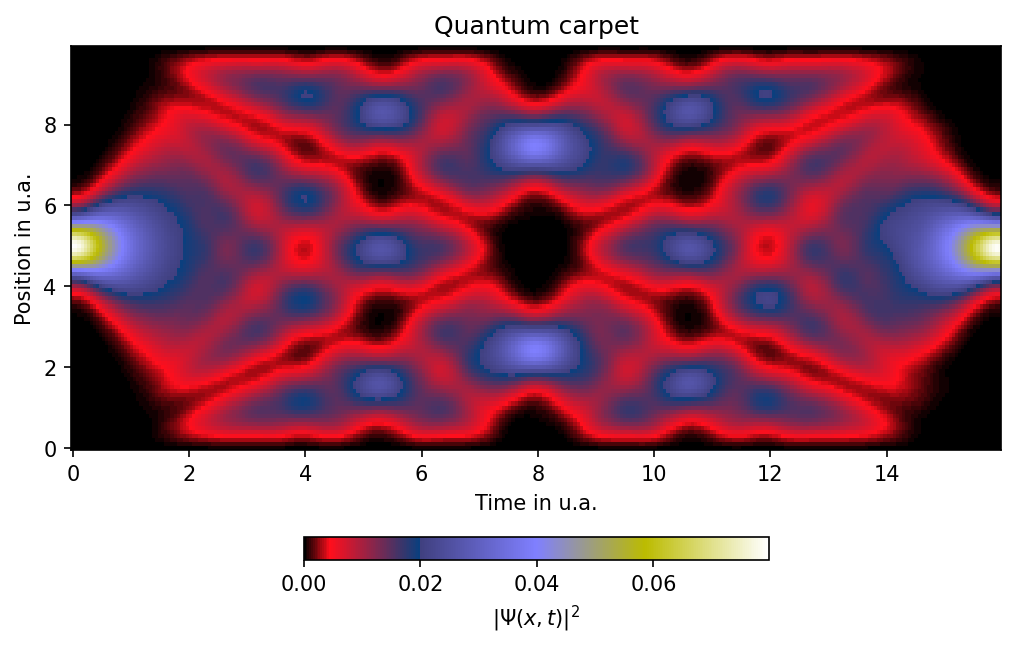

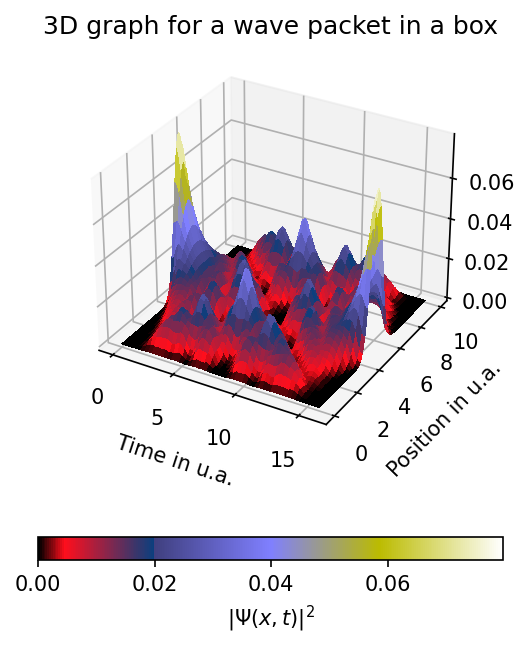

In [129]:
#initial condition
PSI=Psi(POT)

#construct the hamiltonian system
H=Hamiltonian(V,POT)

#Propagate the system
P=Propagator(PSI,H,POT,V)

#check the total probability of the system to be sure its close to one 
print("average probability in the box = ",sum(sum(P)/N_TIME))

# make the colors graph
plt.pcolormesh(XT,XD,P,cmap="gist_stern",shading='auto', vmin=0, vmax=np.max(P))
plt.colorbar(label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
plt.xlabel("Time in u.a.")
plt.ylabel("Position in u.a.")
plt.title("Quantum carpet")
plt.show()

# make the 3D graph
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
XT, XD = np.meshgrid(XT, XD)
surf = ax.plot_surface(XT, XD, P, cmap="gist_stern",linewidth=0, antialiased=False, vmin=0, vmax=np.max(P))


# Add a color bar which maps values to colors and label
fig.colorbar(surf,label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
plt.title("3D graph for a wave packet in a box")
ax.set_xlabel("Time in u.a.")
ax.set_ylabel("Position in u.a.")
plt.show()

<h1 style="font-family:Georgia;text-decoration:gray underline">Variant of the split operator integrator</h1>

We can see the wave packet evolves with time, the dark area means almost or zero chance to find the particle in this area and the colors area means respectively to the color bar the chance to find the particle, this pattern is called Quantum Carpet (because its looks like a carpet).
The dispersion is clearly visible before time $t=2 \ u.a.$, the wave packet seems to spread out in the box.                       
The reason why the packet is not spreading uniformly in the box and form this pattern is because define a box of length $X_{max} = 20 \ u.a.$ by this definition we have set infinite potential wall in $x = 0 \ u.a.$ and $x = 20 \ u.a.$, so when the fastest plane wave of the wave packet meet theses wall he reflect on it and change his direction and when the reflect fastest plane meet the slowest one we have self interference of the Gaussian's wave packet, we have destructive interference in the dark area and constructive interference in the colors area.
The dispersion phenomenon can be explained with the definition of a Gaussian's wave packet, it contains waves of different momenta and hence different velocities, so the waves with a bigger momenta travel faster than others because they have a higher velocity.
This can be understood with the uncertainty principle $\sigma_x \sigma_p = \hbar/2$ at the beginning the wave packet is well localized in terms of position and after the wave packet starts to spread in the box so the uncertainty on the position increases with the time until $t = 16 u.a.$ where the uncertainty on the position seems to be returned to the initial condition.

We know the notion of rest in classical mechanic, meaning that a body in rest remains in its state until a perturbation changes his speed or his direction. This is the lowest possible kinetic energy state. In quantum physics, the stationary state is the lowest possible energy state but this is not a rest state because the wave function is not stationary itself (we have still a probabilistic behavior on position), there is always a phase factor in the complex plane that is time-dependent but for an isolated system it can remain the same with delay in time. On our graph, if we increase $t_{max}$ we can see several times where the probability remains like the initial condition, and this is what is called quantum revival.

One could tell that the phenomenon of wave-packet revival is in opposition with the 2nd principle of thermodynamics. Indeed, this principle tells us that the entropy of an isolated system cannot decrease. If we speak in terms of probability entropy, one can notice that the probability distribution is spread out at $t = 2 u.a.$ (maximum entropy), and then comes back to its initial shape at $t = 16 u.a.$ (minimum entropy).

However, this explanation is only valid if we speak about a physical transformation (thermal exchange for example) of the system, but here we speak about a probability which cannot be interpreted as a physical transformation, just as the potential wall isn't physical. The particle can interact with the potential wall (be reflected or transmitted) but there is no stake of energy here, the particle always keep the same energy in our case.

<h1 style="font-family:Georgia;text-decoration:gray underline" >Wave packet in front of a potential barrier </h1>

<h2 style="font-family:Georgia;text-decoration:gray"> Parameters :</h2>


In [130]:
POT=2
X_MAX=20
N_STEP=100
DELTA_X=X_MAX/N_STEP
XD=[i*DELTA_X for i in range(N_STEP)]
T_MAX=4
N_TIME=100
DELTA_T=T_MAX/N_TIME
XT=[i*DELTA_T for i in range(N_TIME)]
K0=0.5*np.sqrt(6)

Here we will study the behavior of a wave-packet in front of a potential barrier, which will intuitively illustrate the tunnel effect at some point. We consider a particle of mass $m = 1 a.u.$ belonging to $[0, x_{max}]$ with $x_{max} = 20 u.a.$ and set up a potential barrier $V(x)$ from $x_{0} = 10 a.u.$ to $x_{1} = 11 a.u.$ such as :

\begin{equation}
    V(x) = 
    \begin{cases}
        V_{0} \text{ if } x \in [x_{0},x_{1}]\\
        0 \text{ otherwise}
    \end{cases}
\end{equation}

The wave-packet describing the particle is a Gaussian wave-packet with standard deviation $\sigma_{x} = 0.5a.u.$ centered at $\frac{x_{0}}{2} = 5a.u.$ with initial momentum $k_{0}>0$ :

\begin{equation}
\Psi(x,t=0) = \frac{1}{\sqrt{\sigma_x \sqrt{2 \pi}}} e^{-\frac{{(x-x_{0}/2)}^2}{4\sigma_x^2}} e^{ik_{0}x}
\end{equation}

We introduce the quantity $k_{E} = \frac{\sqrt{2mV_{0}}}{\hbar} = \sqrt{6} a.u.$. This momentum can be interpreted in a classical way such as it is the critical value above which the particle will entirely get through the wall, and below which it will be entirely reflected.
First we want to study the influence of the potential bar on our system by plot the density colors graph and the 3D graph for random parameter :


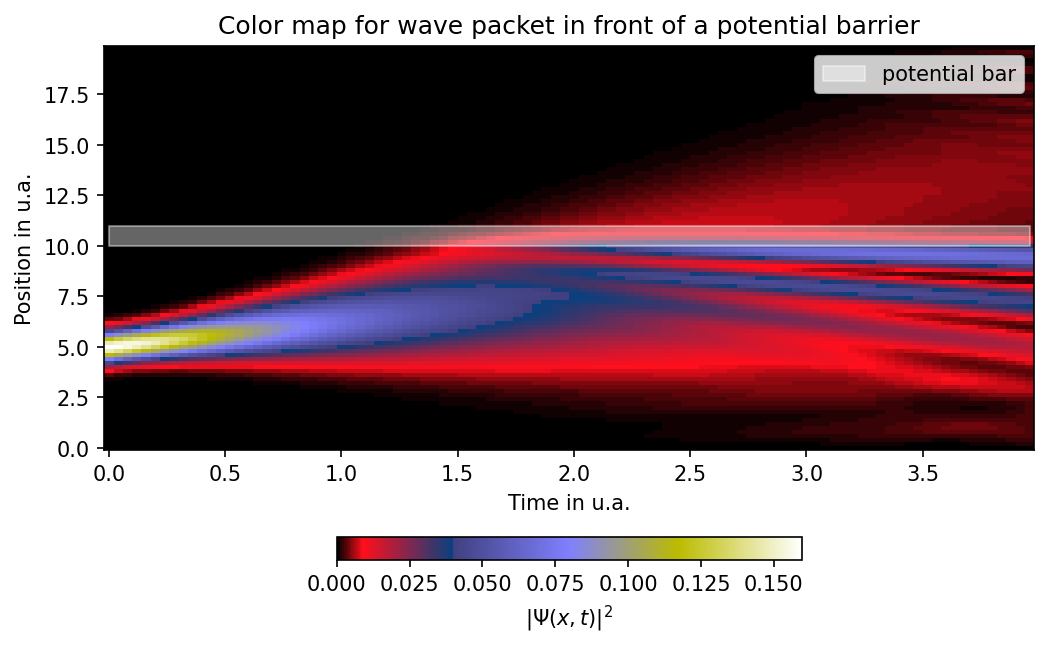

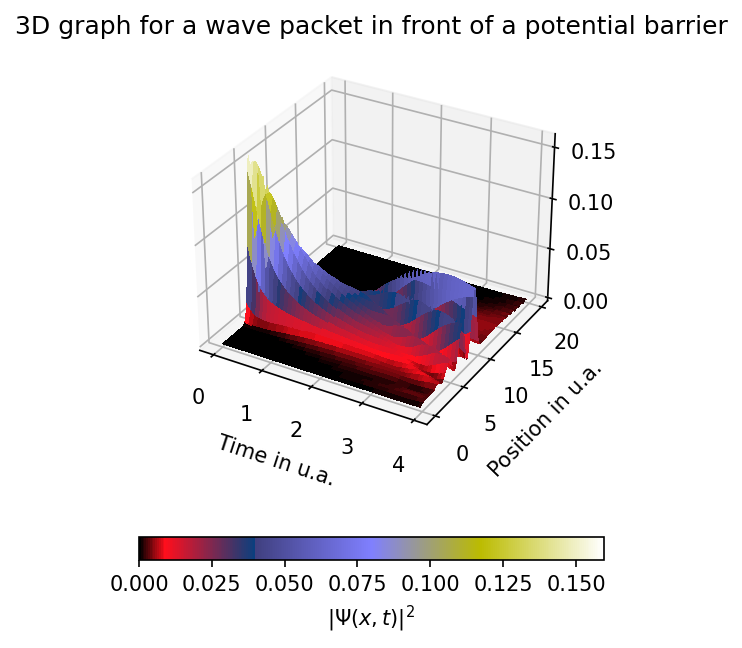

In [131]:
#initial condition
PSI=Psi(POT)

#construct the hamiltonian system
H=Hamiltonian(V,POT)

#Propagate the system
P=Propagator(PSI,H,POT,V)

# make the colors graph
plt.pcolormesh(XT,XD,P,cmap="gist_stern",shading='auto', vmin=0, vmax=np.max(P))
plt.colorbar(label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
plt.fill_between(XT,[10]*N_TIME,y2 =[11]*N_TIME, alpha=0.4,color="white",label='potential bar')
plt.xlabel("Time in u.a.")
plt.ylabel("Position in u.a.")
plt.title("Color map for wave packet in front of a potential barrier")
plt.legend()
plt.show()

# make the 3D graph
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
XT, XD = np.meshgrid(XT, XD )
surf = ax.plot_surface(XT,XD,P, cmap="gist_stern",linewidth=0, antialiased=False, vmin=0, vmax=np.max(P))

# Add a color bar which maps values to colors and label
fig.colorbar(surf,label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
ax.set_xlabel("Time in u.a.")
ax.set_ylabel("Position in u.a.")
plt.title("3D graph for a wave packet in front of a potential barrier")
plt.show()



We can see $\psi$ pass trough the barrier and reflect on it for $0.5 K_E$ in classical study we will expect normally a full reflection, we can see the full difference between classical and quantum world.
Now we will study that for different values of $K_0$ to see more clearly the influence of this parameter.
In order to save space and time we plot all values of $k_{0}$ in a n x n subplot (default 3 x 3 ) so we will have $n^2$ different value of $k_{0}$ uniformly distributed between $0.05 k_{E}$ and $2 k_{E}$.
We can adjust the maximum value of $k_{0}$ by changing $K_{0 \ MAX}$ (in our case $K_{0 \ MAX} = 2 $ ) and the number of subplot by changing n the number of rows and columns of the subplot
one can clearly see two cases confirming the meaning of $k_{E}$.
We will also plot a transparent potential barrier to see clearly where and when the wave packet and barrier are meeting.

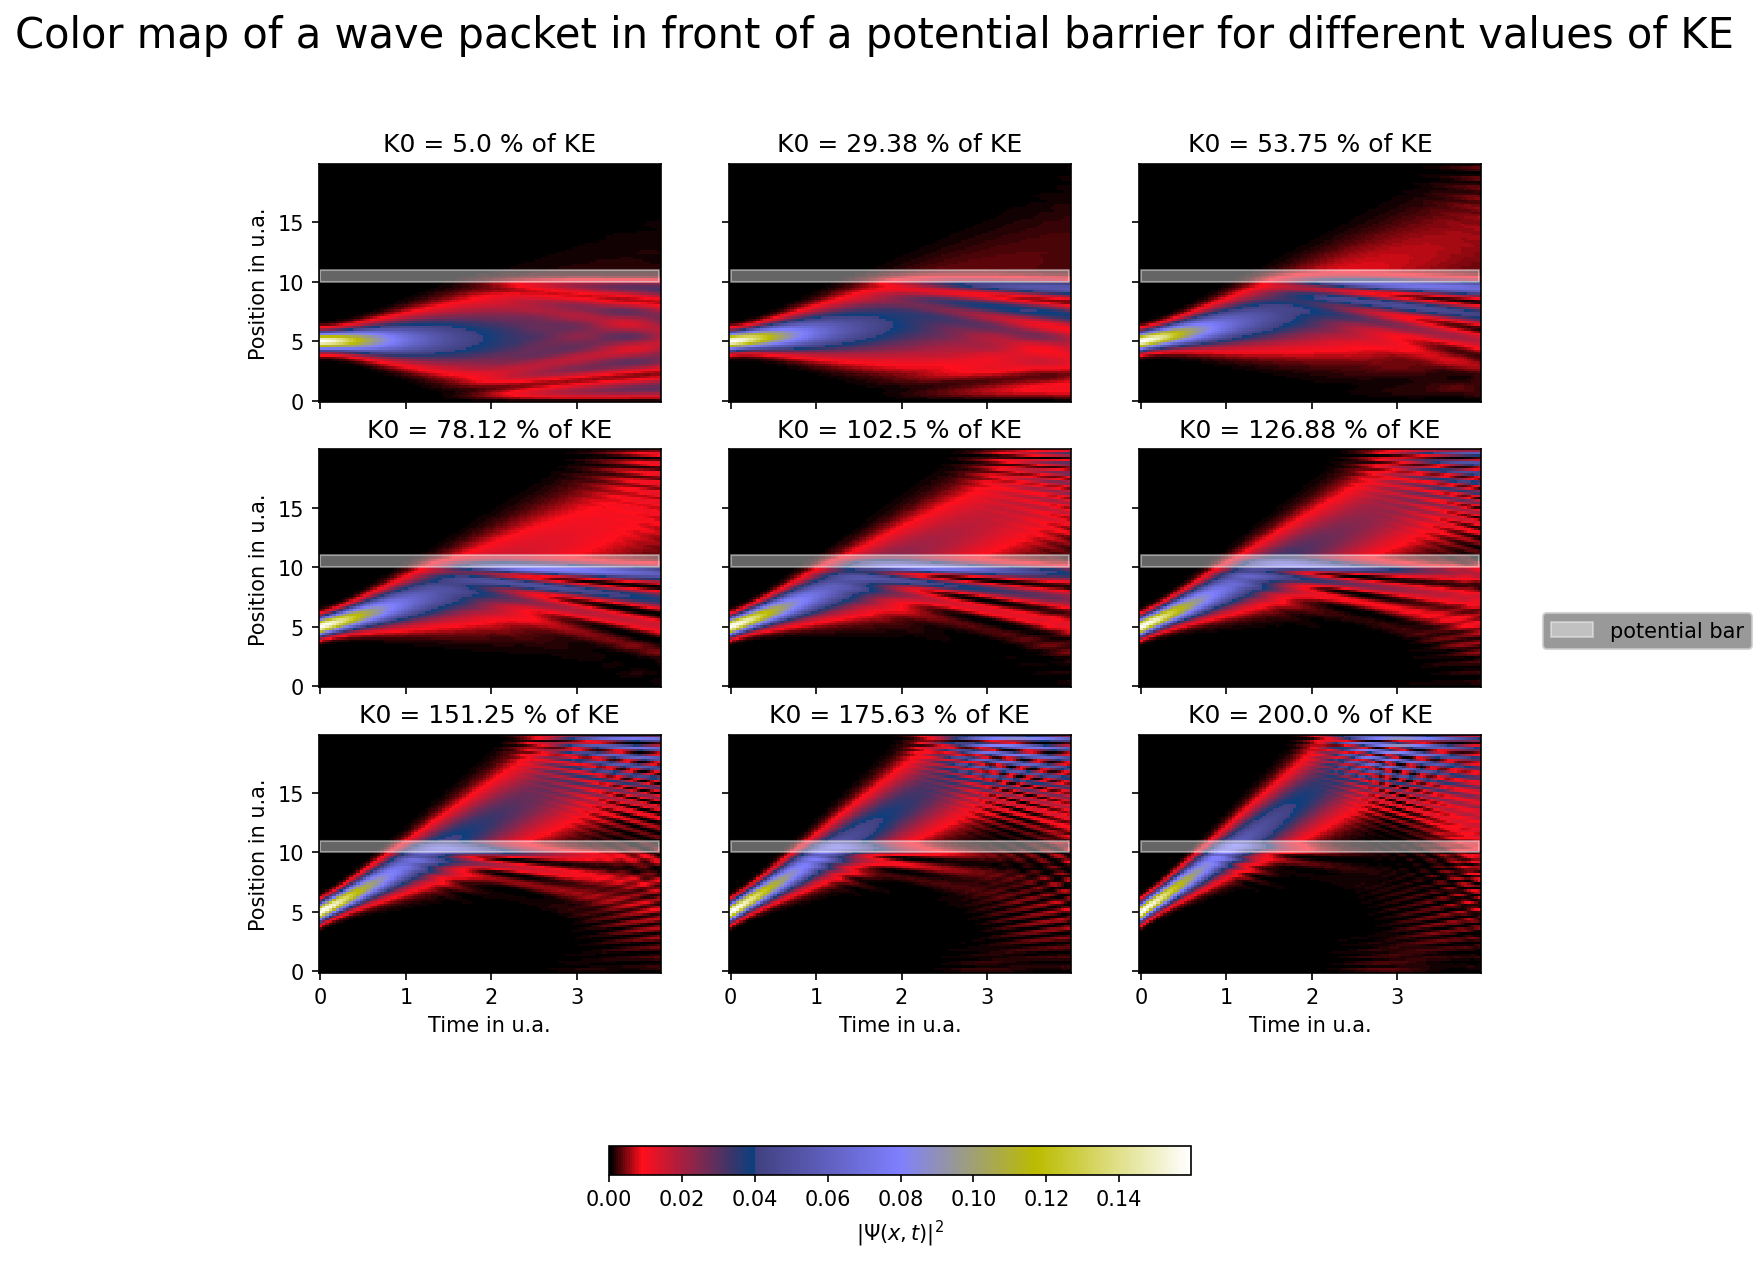

In [132]:
# Make the graph bigger
plt.rcParams['figure.figsize'] = 10,10

# Number of lines and rows
n =3

# Values max in amount of KE
K0_MAX=2

# Values of K0
list_K0=[np.sqrt(2*M*3)*i for i in np.linspace(0.05,K0_MAX,n**2)]

# Incrementation parameter
int=0

# Make the subplot
fig, axs = plt.subplots(n, n)

# Do a loop to chnage the system for each subplot
for ax in axs.flat:
    
    #value of K0
    K0 = list_K0[int]

    # Initial condition
    PSI=Psi(POT)

    # Construct the hamiltonian
    H=Hamiltonian(V,POT)

    # Propagate our system
    P=Propagator(PSI,H,POT,V)

    # Make the density colors graph
    im=ax.pcolormesh(XT,XD,P,cmap="gist_stern",shading='auto', vmin=0, vmax=np.max(P))
    ax.set(xlabel="Time in u.a.", ylabel="Position in u.a.")
    ax.set_title(f"K0 = {round(K0/np.sqrt(6)*100,2)} % of KE")

    # increment the parameter
    int +=1

    # Plot the potential barrier for each subplot
    if ax == axs[-1,-1]:
        ax.fill_between(XT,[10]*N_TIME,y2 =[11]*N_TIME, alpha=0.4,color="white",label='potential bar')
    else:
        # Plot the label for the last graph because its the same for each subplot
        ax.fill_between(XT,[10]*N_TIME,y2 =[11]*N_TIME, alpha=0.4,color="white")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()  


# Label and colors bar
plt.suptitle("Color map of a wave packet in front of a potential barrier for different values of KE ",fontsize="20")
fig.legend(loc="center right",prop={"size" : 10},facecolor = "gray")    
fig.colorbar(im, ax=axs.ravel().tolist(),label=r'$|\Psi (x,t)|^{2}$',location="bottom",shrink=0.5)
plt.show()





Indeed, for the cases in which $k_{0} < k_{E}$, the particle probability is almost all reflected on the wall. However, we can distinguish that a small probability is propagated through the potential wall, which illustrates the phenomenon of tunnel effect.

For the case $k_{0} > k_{E}$, we notice the opposite behavior. The particle tends to get through the potential wall, whereas a small probability of reflection remains.

By considering once again the influence of $k$ in the wave-packet propagation, one can see that the higher $k_{0}$ is, the faster the wave-packet will collide with the potential wall.


<h1 style="font-family:Georgia;text-decoration:gray underline"> Quantum Fermi accelerator :</h1>

In [133]:
POT=3
X_MAX=20
M=1
N_STEP=100
DELTA_X=X_MAX/N_STEP
XD=[i*DELTA_X for i in range(N_STEP)]
T_MAX=30
N_TIME=400
DELTA_T=T_MAX/N_TIME
SIGMA_X=0.5
XT=[i*DELTA_T for i in range(N_TIME)]
TAU=24
p=2
plt.rcParams['figure.figsize'] = 5,5

Now we want study another system called  Quantum Fermi accelerator, this is a wave function in a box $x_{max} =20$ with a potential barrier with time-dependent width at the right of the box :

\begin{equation}
V(x, t)= \begin{cases}0 & \text { if } x<x_{\max }-\frac{\left(x_{\max }-x_{\min }\right)}{2}(1-\cos (\omega t)) \\ V_0 & \text { if } x \geq x_{\max }-\frac{\left(x_{\max }-x_{\min }\right)}{2}(1-\cos (\omega t))\end{cases}
\end{equation}

with : 

- $V_0 =10^{15} u.a.$
- $\omega = \frac{2 \pi}{\tau}$
- $\tau \in [0.5;30] u.a.$  



And our wave function: 
\begin{equation}
\psi(x, t=0)=\sqrt{\frac{2}{x_{\max }}} \sin \left(\frac{p \pi x}{x_{\max }}\right)
\end{equation}

with $p \in \mathbf{N*} $

Instead of the previous system we have a wave function not a wave packet so we expect a non-spreading behavior of our wave function, moreover our wave function is a sinus scale with the length of our box that means the box is a half period of our sinus function.
The parameter p should duplicate the period of our sinus.
Of course a the end we will take the modulus of our function so we will get only positive terms.
We will plot a transparent potential barrier on the subplot to see clearly the shape of it and it influence of our system for each values of parameter.
First we will plot a density colors graph for random parameter and  3D graph : 

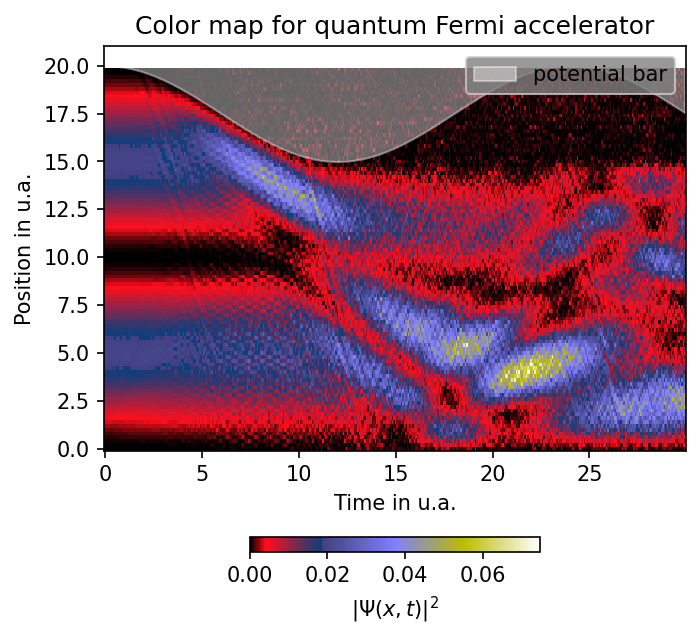

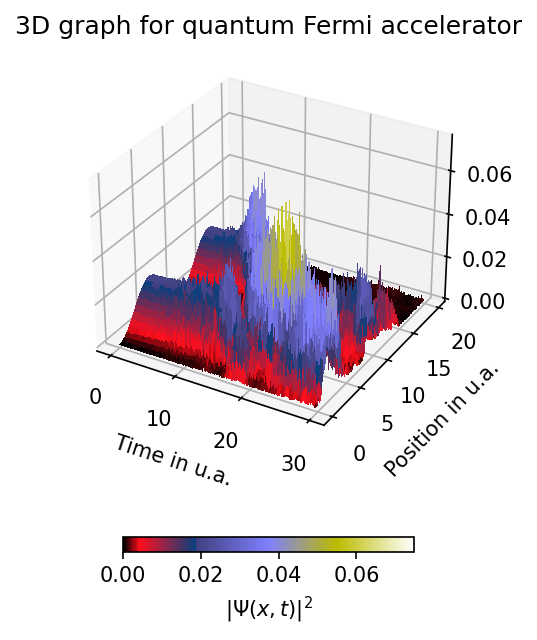

In [134]:
#initial condition
PSI=Psi(POT)

#construct the hamiltonian system
H=Hamiltonian(V,POT)

#Propagate the system
P=Propagator(PSI,H,POT,V)

#Make the potential function
potential=[X_MAX-((X_MAX-0.75*X_MAX)/2)*(1-float(np.cos((2*np.pi/TAU*i)))) for i in XT]

# make the colors graph
plt.pcolormesh(XT,XD,P,cmap="gist_stern",shading='auto', vmin=0, vmax=np.max(P))
plt.colorbar(label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
plt.fill_between(XT, potential,y2=[20]*N_TIME, alpha=0.4,color="white",label='potential bar')
plt.xlabel("Time in u.a.")
plt.ylabel("Position in u.a.")
plt.title("Color map for quantum Fermi accelerator")
plt.legend(facecolor = "gray",prop={"size" : 10})
plt.show()

# make the 3D graph
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
XT, XD = np.meshgrid(XT, XD )
surf = ax.plot_surface(XT,XD,P, cmap="gist_stern",linewidth=0, antialiased=False, vmin=0, vmax=np.max(P))

# Add a color bar which maps values to colors and label
fig.colorbar(surf,label=r'$|\Psi (x,t)|^{2}$',orientation='horizontal',shrink=0.5)
ax.set_xlabel("Time in u.a.")
ax.set_ylabel("Position in u.a.")
plt.title("3D graph for quantum Fermi accelerator")
plt.show()

We can see that we have expected for our wave function a non-spreading behavior and and half period in the box creating two "beam" for $ p = 2 $, the wave function is like avoiding the potential bar that's make sense but the behavior of our wave function is very complicated to interpret we will discuss about it in the second part.
On the 3D graph we can see more intuitively the amplitude of our wave function at the beginning almost $ 0.2 $ and the increasing probability when the wave function is collide the potential bar.


Like in the second system we will do a subplot to see clearly the behavior of our system with specific parameter $p$ and $\tau $ for each subplot.
We have to change p from 1 until 3 and $\tau $ from 0.5 until 30 u.a. our plot will be composed by $n x m$ subplot to don't have too small graph, if you want to see more value of tau you can increase $m$.

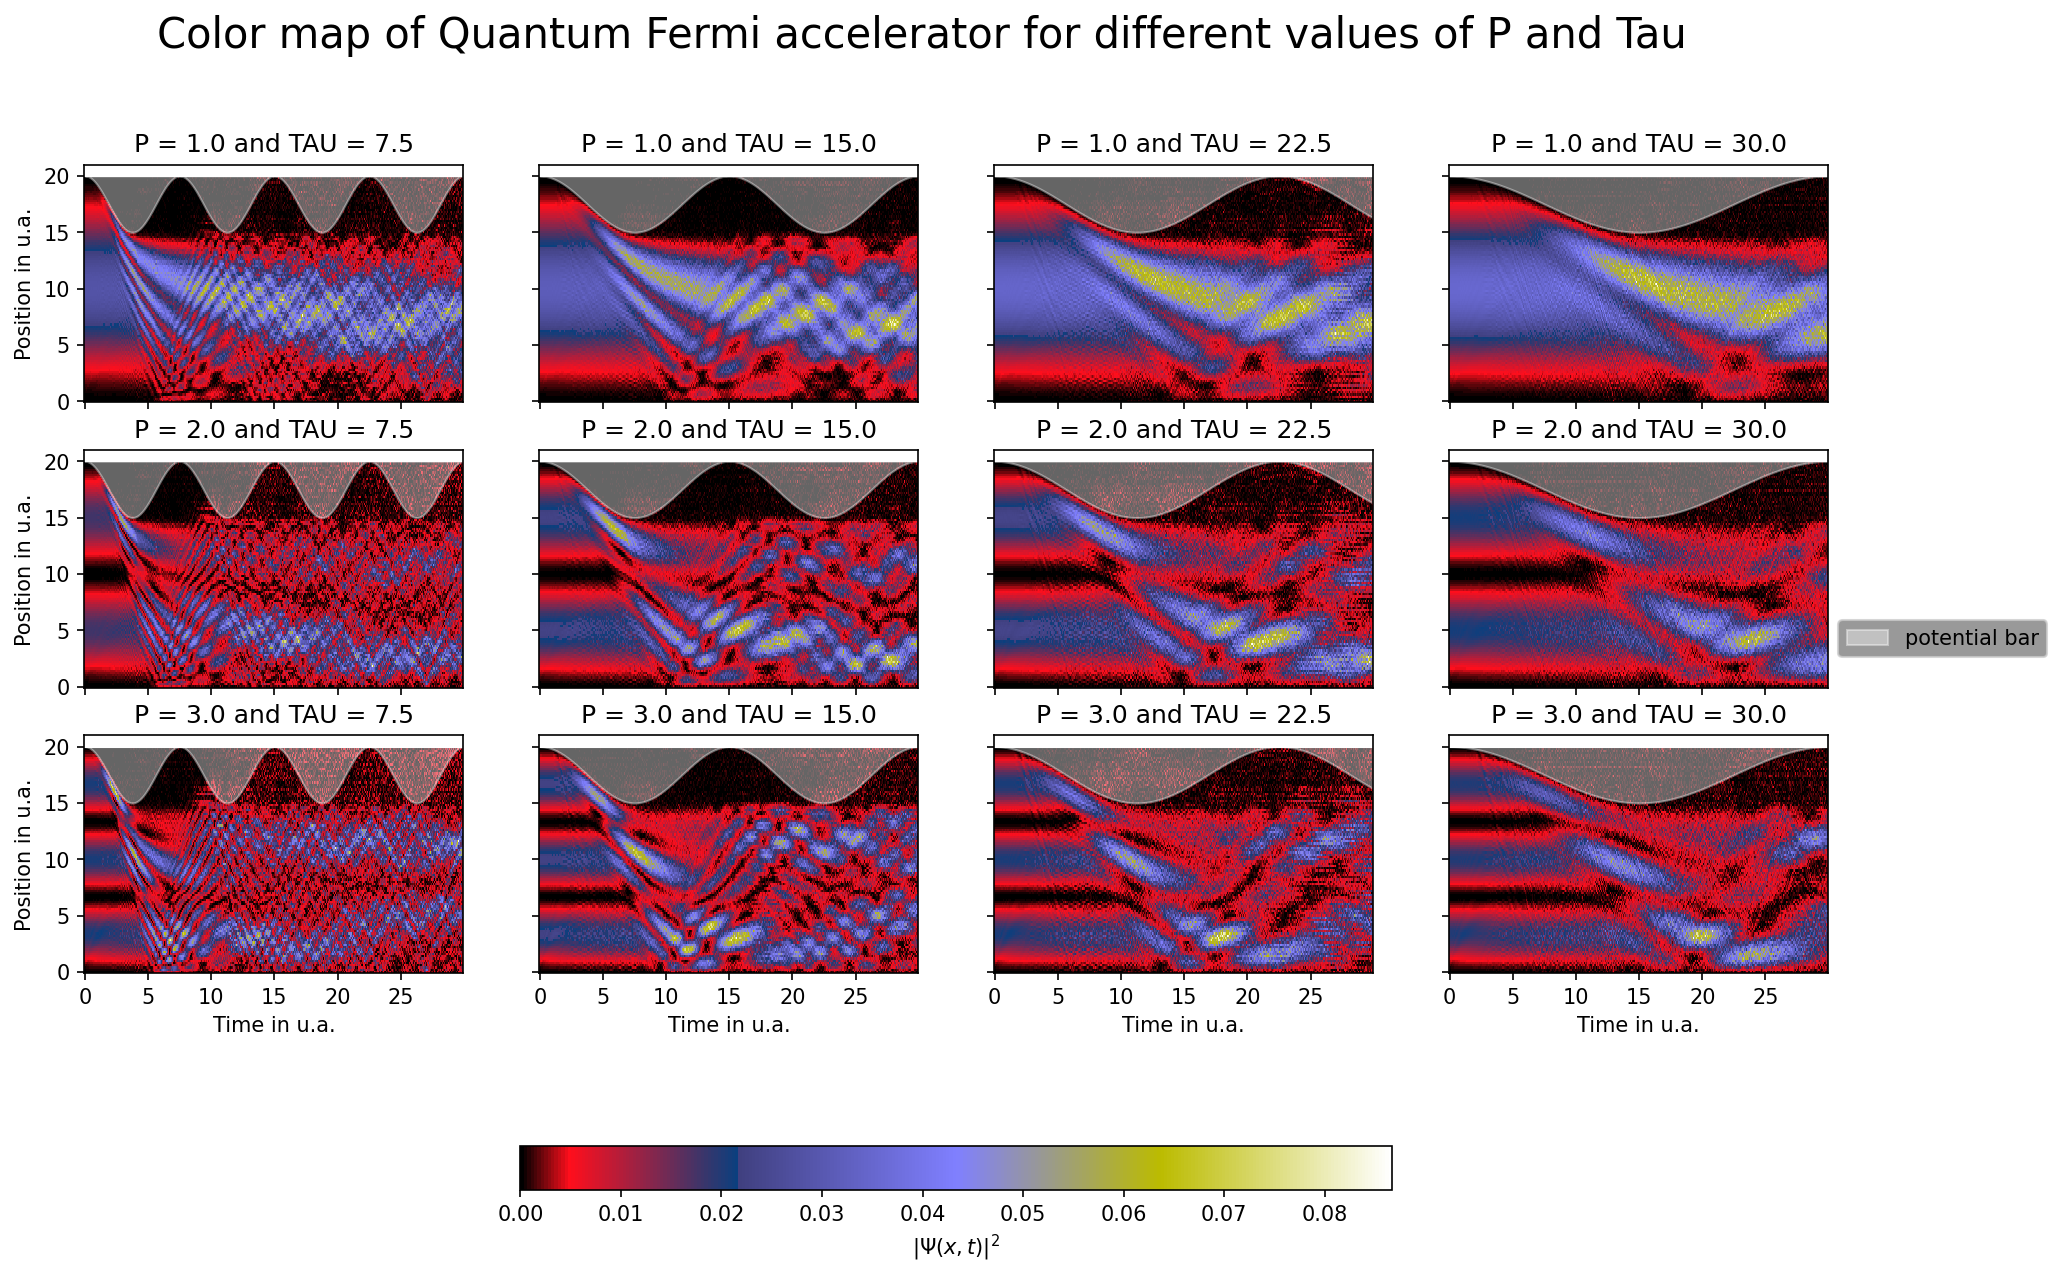

In [135]:
# Make the graph bigger
plt.rcParams['figure.figsize'] = 15,10


# Number of lines and rows
n, m = 3 ,4

# Draw the potential function
potential=[X_MAX-((X_MAX-0.75*X_MAX)/2)*(1-float(np.cos((2*np.pi/TAU*i)))) for i in XT]

# Make the subplot
fig, axs = plt.subplots(n, m)

# Do a loop to chnage the system for each subplot
for ax in axs.flat:

    # Value of p
    p=float(np.where(axs == ax)[0] +1)

    # Value of tau
    TAU=float((np.where(axs == ax)[1] +1)*30/m)

    # Initial condition
    PSI=Psi(POT)

    # Construct the hamiltonian
    H=Hamiltonian(V,POT)

    # Propagate our system
    P=Propagator(PSI,H,POT,V)

    # Make the density colors graph
    im=ax.pcolormesh(XT,XD,P,cmap="gist_stern",shading='auto', vmin=0, vmax=np.max(P))
    ax.set(xlabel="Time in u.a.", ylabel="Position in u.a.")
    ax.set_title(f"P = {p} and TAU = {TAU}")

    # Plot the potential barrier for each subplot
    if ax == axs[-1,-1]:
        ax.fill_between(XT, potential, y2=np.max(potential), alpha=0.4,color="white",label='potential bar')
    else:
        # Plot the label for the last graph because its the same for each subplot
        ax.fill_between(XT, potential, y2=np.max(potential), alpha=0.4,color="white")
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Label and colors bar
plt.suptitle("Color map of Quantum Fermi accelerator for different values of P and Tau ",fontsize="20")   
fig.legend(loc="center right",prop={"size" : 10},facecolor = "gray")    
fig.colorbar(im, ax=axs.ravel().tolist(),label=r'$|\Psi (x,t)|^{2}$',location="bottom",shrink=0.5)
plt.show()


On this graph we have $ 3 x 4 $ subplot with for the rows the values of $p$, and for the columns the values for $\tau$, we see clearly the shape of the barrier with the influence of parameter $\tau$, more $\tau$ is low more the barrier will change  between this minimum width and its maximum. The influence of parameter P is like we expected for $p=3$ we have three "beam".

For $p=1$ we can see the meeting between the $\psi$ and the potential bar cause the deformation of our $\psi$, when it's deforming we have self-interference that cause a reduced probability to find the particle or improve probability to find it. In this case we can see $\psi$ keep an approximate global shapes with interference but we don't loose all the information of our probability especially for the big values of $\tau$ we see $\psi$ is just like compress a little bit and this increase the probability is increase in the middle of the rest of the box.
For $p=2$ we can see for small $\tau$ we have interference and we loose a good amount of information our system, for high values of $\tau$ the two "beam" are push to the other part of the box, we see like interference between the two "beam" cause a increasing probability to find the particle in yellow area. 
For $p=3$ we can see for the small values of we loose almost all the information on $\psi$ and we are whiteness of the chaos in the rest of the box, for the high values of $\tau$ we have a more stable system with our three "beam" like crunch in the rest of the box and a spike of higher probability to find the particle but compare of two previous case we loose more information on it. 

In the potential barrier at certain moment we still have some red points that normally indicate that the probability to find the particle is not negligible but we think this is a "bug" of accuracy of our simulation because the potential barrier is very high and when we increase the number of points ($ N_{TIME} \ and \ N_{STEP}$) we reduced the number of red points but we can't increase enough the accuracy on our graph to remove all the red points.

<h1 style="font-family:Georgia;text-decoration:gray underline"> Conclusion</h1>

In this practical work we have seen three interesting system by propagate the wave function with or without time-dependent potential :

- the first system was the propagation of a wave packet in a box, we have seen the Quantum Carpet, this result en light the nature of the wave packet by demonstrate self-interference of $\psi$ because the wave packet is an infinite sum of plane waves with different momentum and this is why we have a dispersion phenomenon why the wave packet and we haven't it with the wave function for the third system. We have seen the quantum packet revival that reflect an important difference between stationary waves in quantum physics and rest in classical mechanics.

- The second system has reinforced what we showed and concluded in the previous system by showing the intrinsic nature of quantum physics, a complete probabilistic theory.
With this potential barrier we have seen even if the moment is not enough high we see the particle has still a probability to pass trough it by tunnel effect and reciprocally even with a higher momentum the particle still have a probability to reflect on the potential barrier.

- The last system showed us what we can do with a particle and a potential barrier we can restricted the area of a box, that influence the particle by move it this why the system his called Quantum Fermi accelerator. We have seen also the impact of the potential barrier on $\psi$ we can loose information and get great disorder for the small value of $\tau$ but for the higher value we can get a system more stable.

With theses three system and the previous practical work we have seen several method to numerically integrate the Schrodinger's equation, how to represent infinite dimensional system and the variant of split operator to propagate a particle in a box and study the behavior of $\psi$ with potential barrier or not and what we can do after studding the influence of them.